In [66]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torchvision
import torchvision.transforms as transforms
import numpy as np
import pandas as pd
from torch.utils.data import DataLoader, Dataset
from torch.utils.data import random_split
import matplotlib.pyplot as plt
from torchinfo import summary

5


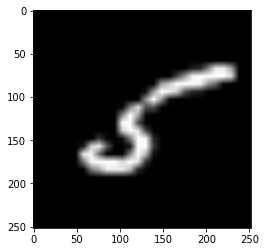

In [2]:
train_dataset = torchvision.datasets.MNIST(root="./", train=True, download=True)
image, label = train_dataset[11]
print(label)
plt.imshow(image, cmap="gray")
a = transforms.Resize(252)(image)
plt.imshow(a, cmap="gray")

# Training Vanilla CNN for MNIST Data

In [4]:
#Hyper Parameters
batch_size = 32
learning_rate = 0.001
epochs = 1
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize(mean=0.1307, std=0.3081)])
train_dataset = torchvision.datasets.MNIST(root="./", train=True, download=True, transform=transform)
test_dataset = torchvision.datasets.MNIST(root="./", train=False, download=True, transform=transform)
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=True)

class CNN(nn.Module):
    def __init__(self):
        super(CNN, self).__init__()
        self.conv1 = nn.Conv2d(1, 12, kernel_size=1)
        self.conv2 = nn.Conv2d(12, 6, kernel_size=3)
        self.max_pool = nn.MaxPool2d(2, 2)
        self.fc1 = nn.Linear(1014, 256)
        self.fc2 = nn.Linear(256, 128)
        self.fc3 = nn.Linear(128,10)

    def forward(self, x):
        x = F.relu(self.conv1(x))
        x = F.relu(self.conv2(x))
        x = self.max_pool(x)
        x = x.view(-1, 1014)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x
    
model = CNN().to(device=device)
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr = learning_rate)

n_total_steps = len(train_loader)
for epoch in range(epochs):
    for i, (images, labels) in enumerate(train_loader):
        images = images.to(device)
        labels = labels.to(device)

        outputs = model(images)
        loss = criterion(outputs, labels)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        if (i+1) % 100 == 0:
            print(f'Epoch [{epoch+1}/{epochs}], Step [{i+1}/{n_total_steps}], Loss: {loss.item():.4f} ')

Epoch [1/1], Step [100/1875], Loss: 0.6733 
Epoch [1/1], Step [200/1875], Loss: 0.2787 
Epoch [1/1], Step [300/1875], Loss: 0.3791 
Epoch [1/1], Step [400/1875], Loss: 0.3074 
Epoch [1/1], Step [500/1875], Loss: 0.1071 
Epoch [1/1], Step [600/1875], Loss: 0.1207 
Epoch [1/1], Step [700/1875], Loss: 0.1889 
Epoch [1/1], Step [800/1875], Loss: 0.4430 
Epoch [1/1], Step [900/1875], Loss: 0.2902 
Epoch [1/1], Step [1000/1875], Loss: 0.1656 
Epoch [1/1], Step [1100/1875], Loss: 0.0938 
Epoch [1/1], Step [1200/1875], Loss: 0.2238 
Epoch [1/1], Step [1300/1875], Loss: 0.0591 
Epoch [1/1], Step [1400/1875], Loss: 0.0747 
Epoch [1/1], Step [1500/1875], Loss: 0.1415 
Epoch [1/1], Step [1600/1875], Loss: 0.0189 
Epoch [1/1], Step [1700/1875], Loss: 0.0102 
Epoch [1/1], Step [1800/1875], Loss: 0.0465 


In [11]:
def data_aug(img_tensor):
    aug = transforms.RandomResizedCrop(20, scale=(0.08,0.1))(img_tensor)
    aug = transforms.RandomHorizontalFlip(p=0.5)(aug)
    aug = transforms.ColorJitter(brightness=0.4, contrast=0.4, saturation=0.2, hue=0.1)(aug)
    #aug = transforms.RandomGrayscale(0.2)(aug)
    aug = transforms.GaussianBlur(kernel_size=23, sigma=0.5)(aug)
    aug = transforms.RandomSolarize(threshold=0.3,p=0.1)(aug)
    #aug = transforms.Normalize()(aug)
    return aug
    

N = 32
data = torch.rand(N,1,20,20)
data = data_aug(data)
print(data.shape)
conv1 = nn.Conv2d(1, 32, kernel_size=1)
conv2 = nn.Conv2d(32, 64, kernel_size=3)
max_pool = nn.MaxPool2d(2, 2)
x = conv1(data)
print(f"Tensor shape after first Conv Layer: {x.shape} ")
x = conv2(x)
print(f"Tensor shape after second Conv Layer: {x.shape}")
x = max_pool(x)
print(f"Tensor shape after MaxPool Layer: {x.shape}")
x = x.view(-1,5184)
print(x.shape)
fc1 = nn.Linear(5184, 256)
x = fc1(x)
print(f"Tensor shape after first FC Layer: {x.shape}")
fc2 = nn.Linear(256, 128)
x = fc2(x)
print(f"Tensor shape after second FC Layer: {x.shape}")
fc3 = nn.Linear(128,10)
x = fc3(x)
print(f"Tensor shape after third FC Layer: {x.shape}")

torch.Size([32, 1, 20, 20])
Tensor shape after first Conv Layer: torch.Size([32, 32, 20, 20]) 
Tensor shape after second Conv Layer: torch.Size([32, 64, 18, 18])
Tensor shape after MaxPool Layer: torch.Size([32, 64, 9, 9])
torch.Size([32, 5184])
Tensor shape after first FC Layer: torch.Size([32, 256])
Tensor shape after second FC Layer: torch.Size([32, 128])
Tensor shape after third FC Layer: torch.Size([32, 10])


## Testing Torch Augmentations

In [7]:
#Hyper Parameters
batch_size = 32
learning_rate = 0.001
epochs = 1

transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize(mean=0.1307, std=0.3081)])
train_dataset = torchvision.datasets.MNIST(root="./", train=True, download=True, transform=transform)
test_dataset = torchvision.datasets.MNIST(root="./", train=False, download=True, transform=transform)
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=True)

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')


class CNN_augs(nn.Module):
    def __init__(self):
        super(CNN_augs, self).__init__()
        self.conv1 = nn.Conv2d(1, 12, kernel_size=1)
        self.conv2 = nn.Conv2d(12, 6, kernel_size=3)
        self.max_pool = nn.MaxPool2d(2, 2)
        self.fc1 = nn.Linear(486, 256)
        self.fc2 = nn.Linear(256, 128)
        # change output channels to multiples of 2 --> maybe 16, 32??
        self.fc3 = nn.Linear(128,10)

    def forward(self, x):
        x = F.relu(self.conv1(x))
        x = F.relu(self.conv2(x))
        x = self.max_pool(x)
        x = x.view(-1,486)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x
    def data_aug(self, img_tensor):
        aug = transforms.RandomResizedCrop(20, scale=(0.08,0.1))(img_tensor)
        aug = transforms.RandomHorizontalFlip(p=0.5)(aug)
        aug = transforms.ColorJitter(brightness=0.4, contrast=0.4, saturation=0.2, hue=0.1)(aug)
        #aug = transforms.RandomGrayscale(0.2)(aug)
        aug = transforms.GaussianBlur(kernel_size=23, sigma=0.5)(aug)
        aug = transforms.RandomSolarize(threshold=0.3,p=0.1)(aug)
        #aug = transforms.Normalize()(aug)
        return aug
    

model = CNN_augs().to(device=device)
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr = learning_rate)

n_total_steps = len(train_loader)
for epoch in range(epochs):
    for i, (images, labels) in enumerate(train_loader):
        images = images.to(device)
        images = model.data_aug(images)
        labels = labels.to(device)

        outputs = model(images)
        # compute loss between two different data augs!
        loss = criterion(outputs, labels)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        if (i+1) % 100 == 0:
            print(f'Epoch [{epoch+1}/{epochs}], Step [{i+1}/{n_total_steps}], Loss: {loss.item():.4f} ')

Epoch [1/1], Step [100/1875], Loss: 2.3179 
Epoch [1/1], Step [200/1875], Loss: 2.3040 
Epoch [1/1], Step [300/1875], Loss: 2.3448 
Epoch [1/1], Step [400/1875], Loss: 2.2355 
Epoch [1/1], Step [500/1875], Loss: 2.2036 
Epoch [1/1], Step [600/1875], Loss: 2.2517 
Epoch [1/1], Step [700/1875], Loss: 2.2996 
Epoch [1/1], Step [800/1875], Loss: 2.2830 
Epoch [1/1], Step [900/1875], Loss: 2.2156 
Epoch [1/1], Step [1000/1875], Loss: 2.2059 
Epoch [1/1], Step [1100/1875], Loss: 2.3068 
Epoch [1/1], Step [1200/1875], Loss: 2.2305 
Epoch [1/1], Step [1300/1875], Loss: 2.3327 
Epoch [1/1], Step [1400/1875], Loss: 2.2938 
Epoch [1/1], Step [1500/1875], Loss: 2.0780 
Epoch [1/1], Step [1600/1875], Loss: 2.1877 
Epoch [1/1], Step [1700/1875], Loss: 2.1863 
Epoch [1/1], Step [1800/1875], Loss: 2.1506 


In [6]:
model = CNN_augs().to(device=device)
summary(model, input_size=[(batch_size, 1, 20, 20)])

Layer (type:depth-idx)                   Output Shape              Param #
CNN_augs                                 [128, 10]                 --
├─Conv2d: 1-1                            [128, 12, 20, 20]         24
├─Conv2d: 1-2                            [128, 6, 18, 18]          654
├─MaxPool2d: 1-3                         [128, 6, 9, 9]            --
├─Linear: 1-4                            [128, 256]                124,672
├─Linear: 1-5                            [128, 128]                32,896
├─Linear: 1-6                            [128, 10]                 1,290
Total params: 159,536
Trainable params: 159,536
Non-trainable params: 0
Total mult-adds (M): 48.69
Input size (MB): 0.20
Forward/backward pass size (MB): 7.31
Params size (MB): 0.64
Estimated Total Size (MB): 8.15

# Implementing VICReg

In [30]:
#Hyper Parameters
batch_size = 32
learning_rate = 0.0001
epochs = 1
# Dimension (D) of the representations
embedding_dimension = 10
lam = 1
mu = 0.1
nu = 1e-09

transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize(mean=0.1307, std=0.3081)])
train_dataset = torchvision.datasets.MNIST(root="./", train=True, download=True, transform=transform)
test_dataset = torchvision.datasets.MNIST(root="./", train=False, download=True, transform=transform)
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=True)

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')


class CNN_augs(nn.Module):
    def __init__(self):
        super(CNN_augs, self).__init__()
        #32 output channels --> change kernel size to 3 or 5
        self.conv1 = nn.Conv2d(1, 32, kernel_size=1)
        #64 output channels --> 
        self.conv2 = nn.Conv2d(32, 64, kernel_size=3)
        self.max_pool = nn.MaxPool2d(2, 2)
        self.fc1 = nn.Linear(5184, 256)
        self.fc2 = nn.Linear(256, 128)
        # 3 fully connected layers
        # embedding dimension will be 32
        self.fc3 = nn.Linear(128,embedding_dimension)

    def forward(self, x):
        x = F.relu(self.conv1(x))
        x = F.relu(self.conv2(x))
        x = self.max_pool(x)
        x = x.view(-1,5184)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x
    def data_aug(self, img_tensor):
        aug = transforms.RandomResizedCrop(20, scale=(0.08,0.1))(img_tensor)
        aug = transforms.RandomHorizontalFlip(p=0.5)(aug)
        aug = transforms.ColorJitter(brightness=0.4, contrast=0.4, saturation=0.2, hue=0.1)(aug)
        #aug = transforms.RandomGrayscale(0.2)(aug)
        aug = transforms.GaussianBlur(kernel_size=23, sigma=0.5)(aug)
        aug = transforms.RandomSolarize(threshold=0.3,p=0.1)(aug)
        #aug = transforms.Normalize()(aug)
        return aug
    def off_diagonal(self, x):
        n, m = x.shape
        assert n == m
        return x.flatten()[:-1].view(n - 1, n + 1)[:, 1:].flatten()
        
    

model_vicreg = CNN_augs().to(device=device)
print(summary(model_vicreg, input_size=[(batch_size, 1, 20, 20)]))
# criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model_vicreg.parameters(), lr = learning_rate)

f = open("/Users/cpare/repos/VICReg_project/csv's/VICReg_metrics2.csv","w+" )
f.write("Epoch, Loss\n")
f.close()
n_total_steps = len(train_loader)
for epoch in range(epochs):
    running_loss = 0.0
    for i, (images, labels) in enumerate(train_loader):
        images = images.to(device)
        # two randomly augmented versions of image
        image_i = model_vicreg.data_aug(images)
        image_j = model_vicreg.data_aug(images)

        labels = labels.to(device)
        #compute representations
        output_i = model_vicreg(image_i)
        output_j = model_vicreg(image_j)

        #invariance loss
        sim_loss = nn.MSELoss()
        sim_loss = lam * sim_loss(output_i, output_j)

        #variance loss
        std_output_i = torch.sqrt(torch.var(output_i, dim=0) + 1e-04)
        std_output_j = torch.sqrt(torch.var(output_j, dim = 0) + 1e-04)
        std_loss = torch.mean(F.relu(1-std_output_i)) + torch.mean(F.relu(1-std_output_j))

        #covariance loss
        output_i = output_i - torch.mean(output_i, dim=0)
        output_j = output_j - torch.mean(output_j, dim=0)
        cov_output_i = (torch.matmul(torch.transpose(output_i, 0, 1), output_i) / (batch_size -1))
        cov_output_j = (torch.matmul(torch.transpose(output_j, 0, 1), output_j) / (batch_size -1))
        cov_loss = (model_vicreg.off_diagonal(cov_output_i).pow(2).sum() / embedding_dimension) + (model_vicreg.off_diagonal(cov_output_j).pow(2).sum() / embedding_dimension)

        # compute loss between two different data augs!
        # train for 20 epochs and make a loss curve
        loss = (sim_loss) + (mu * std_loss) + (nu*cov_loss)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        running_loss += loss.item() * image_i.size(1)

        if (i+1) % 100 == 0:
            print(f'Epoch [{epoch+1}/{epochs}], Step [{i+1}/{n_total_steps}], Loss: {loss.item():.4f} ')
    epoch_loss = running_loss / len(train_loader)
    f = open("/Users/cpare/repos/VICReg_project/csv's/VICReg_metrics2.csv", "a")
    f.write(f"{epoch + 1}, {epoch_loss}\n")
    f.close()

Layer (type:depth-idx)                   Output Shape              Param #
CNN_augs                                 [32, 10]                  --
├─Conv2d: 1-1                            [32, 32, 20, 20]          64
├─Conv2d: 1-2                            [32, 64, 18, 18]          18,496
├─MaxPool2d: 1-3                         [32, 64, 9, 9]            --
├─Linear: 1-4                            [32, 256]                 1,327,360
├─Linear: 1-5                            [32, 128]                 32,896
├─Linear: 1-6                            [32, 10]                  1,290
Total params: 1,380,106
Trainable params: 1,380,106
Non-trainable params: 0
Total mult-adds (M): 236.16
Input size (MB): 0.05
Forward/backward pass size (MB): 8.69
Params size (MB): 5.52
Estimated Total Size (MB): 14.26
Epoch [1/1], Step [100/1875], Loss: 0.1959 
Epoch [1/1], Step [200/1875], Loss: 0.1963 
Epoch [1/1], Step [300/1875], Loss: 0.1950 
Epoch [1/1], Step [400/1875], Loss: 0.1951 
Epoch [1/1], Step [50

KeyboardInterrupt: 

## Downstream tasks
- **Classification**
- Regression
- Simulate representation of the data
- Autoencoder --> anomaly detection

In [81]:
def off_diagonal(x):
    n, m = x.shape
    # checking we have a square matrix where columns and rows are the same
    assert n == m
    off_diag = x.clone()
    off_diag = off_diag.flatten()
    # getting all elements except the last corner element
    off_diag  = off_diag[:-1]
    # reshape the tensor with remaining elements
    off_diag = off_diag.view(n-1, n+1)
    # the first slice is gathering all rows, the second slice is getting every columns except the first 
    off_diag = off_diag[:, 1:]
    # flattening matrix
    off_diag = off_diag.flatten()
    return off_diag
    #return x.flatten()[:-1].view(n - 1, n + 1)[:, 1:].flatten()

In [34]:
df = pd.read_csv("/Users/cpare/repos/VICReg_project/csv's/VICReg_metrics.csv")
df.head()

,Epoch,Loss
0,1,0.195379
1,2,0.195063
2,3,0.195006
3,4,0.194768
4,5,0.194138


[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20]


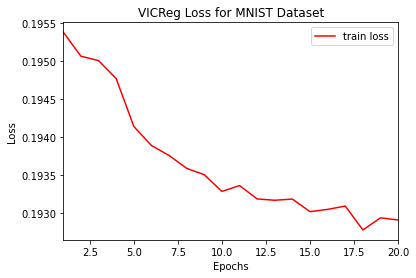

In [55]:
epochs = np.array(df.iloc[:,0])
losses = np.array(df.iloc[:,1])
print(epochs)
plt.plot(epochs, losses, label = "train loss", color = "red")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.xlim(1,20)
plt.title("VICReg Loss for MNIST Dataset")
plt.legend()
plt.savefig("/Users/cpare/repos/VICReg_project/plots/loss_20epochs.png")


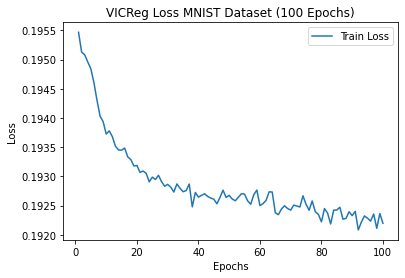

In [65]:
df = pd.read_csv("/Users/cpare/repos/VICReg_project/csv's/VICReg_metrics_100epochs.csv")
epochs = np.array(df.iloc[:, 0])
losses = np.array(df.iloc[:,1])

plt.plot(epochs, losses, label = "Train Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.title("VICReg Loss MNIST Dataset (100 Epochs)")
plt.savefig("/Users/cpare/repos/VICReg_project/plots/loss_100epochs.png")

In [69]:
df = pd.read_csv("/Users/cpare/repos/VICReg_project/csv's/VICReg_metrics_allLosses.csv")
df.head()

,Epoch,Loss,Invariance Loss,Variance Loss,Covariance Loss
0,1,0.195688,0.003710,0.191978,1.780991e-13
1,2,0.195276,0.004236,0.191040,2.547968e-13
2,3,0.195146,0.004387,0.190759,2.795214e-13
3,4,0.195095,0.004445,0.190650,2.784698e-13
4,5,0.194971,0.004566,0.190405,3.054706e-13


In [71]:
epochs = np.array(df.iloc[:,0])
total_loss = np.array(df.iloc[:,1])
inv_loss = np.array(df.iloc[:,2])
var_loss = np.array(df.iloc[:,3])
cov_loss = np.array(df.iloc[:,4])

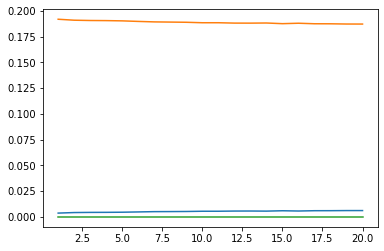

In [77]:

plt.plot(epochs, inv_loss)
plt.plot(epochs, var_loss)
plt.plot(epochs, cov_loss)